In [1]:
import nltk
import random
import pickle
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode  
import matplotlib.pyplot as plt
from html.parser import HTMLParser

In [2]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self.classifiers = classifiers
    
    def classify(self, features): #Se realiza la votacion de que tipo es, pos o neg
        votes = []
        for c in self.classifiers:
            v = c.classify(features)
            votes.append(v)
            #print(votes)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self.classifiers:
            v = c.classify(features)
            votes.append(v)
            #print(votes)
        choice_votes = votes.count(mode(votes))
        print(choice_votes)
        conf = choice_votes / len(votes)
        return conf
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [3]:
def accuracy(classifier,testing_set):
    print("Original Algoritmo Naive Bayes accuracy:",(nltk.classify.accuracy(classifier, testing_set))*100)
    #classifier.show_most_informative_features(15)

    MNB_classifier = SklearnClassifier(MultinomialNB())
    MNB_classifier.train(training_set)
    print("MNB_classifier Algoritmo Naive Bayes accuracy:",(nltk.classify.accuracy(MNB_classifier, testing_set))*100)

    BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
    BernoulliNB_classifier.train(training_set)
    print("BernoulliNB_classifier Algoritmo Naive Bayes accuracy:",(nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

    #save_classifier = open("naivebayes.pickle","wb")
    #pickle.dump(classifier, save_classifier)
    #save_classifier.close()

    LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
    LogisticRegression_classifier.train(training_set)
    print("Algoritmo LogisticRegression_classifier accuracy:",(nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

    SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
    SGDClassifier_classifier.train(training_set)
    print("Algoritmo SGDClassifier_classifier accuracy:",(nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

    SVC_classifier = SklearnClassifier(SVC())
    SVC_classifier.train(training_set)
    print("Algoritmo SVC_classifier accuracy:",(nltk.classify.accuracy(SVC_classifier, testing_set))*100)

    LinearSVC_classifier = SklearnClassifier(LinearSVC())
    LinearSVC_classifier.train(training_set)
    print("Algoritmo LinearSVC_classifier accuracy:",(nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

    NuSVC_classifier = SklearnClassifier(NuSVC())
    NuSVC_classifier.train(training_set)
    print("Algoritmo NuSVC_classifier accuracy:",(nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)
    return MNB_classifier,BernoulliNB_classifier,LogisticRegression_classifier,SGDClassifier_classifier,SVC_classifier,NuSVC_classifier

In [4]:
def Clasificadores(review,classifier,testing_set,MNB_classifier,BernoulliNB_classifier,LogisticRegression_classifier, SGDClassifier_classifier,SVC_classifier,NuSVC_classifier):
    voted_cassifier = VoteClassifier(classifier,MNB_classifier,BernoulliNB_classifier,LogisticRegression_classifier,
                                     SGDClassifier_classifier,SVC_classifier,NuSVC_classifier)#,LinearSVC_classifier)
    print("voted_cassifier accuracy percent:",(nltk.classify.accuracy(voted_cassifier, testing_set))*100)

    print("Clasificacion:", voted_cassifier.classify(review), "Confianza %:",
          voted_cassifier.confidence(review)*100)
    return voted_cassifier.classify(review)

In [5]:
def find_features(documet):
    words = set(documet)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [7]:
documents = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() 
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
    
all_words = nltk.FreqDist(all_words) #Frecuencia de distribucion

word_features = list(all_words.keys())[:10000]

featuresets = [(find_features(rev), category) for (rev,category) in documents]

#Tercera parte de arriba
    
training_set = featuresets[:1500]
testing_set = featuresets[1500:]
classifier_f = open("naivebayes.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()
MNB_classifier,BernoulliNB_classifier,LogisticRegression_classifier,SGDClassifier_classifier,SVC_classifier,NuSVC_classifier = accuracy(classifier,testing_set)
#Clasificadores(testing_set[0][0],classifier,testing_set)

Original Algoritmo Naive Bayes accuracy: 91.60000000000001
MNB_classifier Algoritmo Naive Bayes accuracy: 83.39999999999999
BernoulliNB_classifier Algoritmo Naive Bayes accuracy: 83.2
Algoritmo LogisticRegression_classifier accuracy: 85.8


C:\Users\santiago\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Algoritmo SGDClassifier_classifier accuracy: 83.0
Algoritmo SVC_classifier accuracy: 45.800000000000004
Algoritmo LinearSVC_classifier accuracy: 83.0
Algoritmo NuSVC_classifier accuracy: 86.0


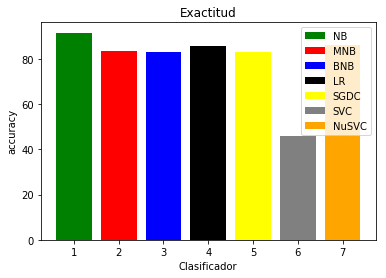

In [8]:
x = [1]
NB = nltk.classify.accuracy(classifier, testing_set)*100
x2 = [2]
MNB = nltk.classify.accuracy(MNB_classifier, testing_set)*100
x3 = [3]
BNB = nltk.classify.accuracy(BernoulliNB_classifier, testing_set)*100
x4 = [4]
LR = nltk.classify.accuracy(LogisticRegression_classifier, testing_set)*100
x5 = [5]
SGDC = nltk.classify.accuracy(SGDClassifier_classifier, testing_set)*100
x6 = [6]
SVC = nltk.classify.accuracy(SVC_classifier, testing_set)*100
#x7 = [7]
#LSVC = nltk.classify.accuracy(LinearSVC_classifier, testing_set)*100
x7 = [7]
NuSVC = nltk.classify.accuracy(NuSVC_classifier, testing_set)*100

plt.bar(x, NB, label='NB', color='green')
plt.bar(x2, MNB, label='MNB', color='red')
plt.bar(x3, BNB, label='BNB', color='blue')
plt.bar(x4, LR, label='LR', color='black')
plt.bar(x5, SGDC, label='SGDC', color='yellow')
plt.bar(x6, SVC, label='SVC', color='gray')
#plt.bar(x7, LSVC, label='LSVC', color='purple')
plt.bar(x7, NuSVC, label='NuSVC', color='orange')

plt.xlabel('Clasificador')
plt.ylabel('accuracy')
plt.title('Exactitud')
plt.legend()
plt.show()

In [ ]:
stop_words = set(stopwords.words("english"))

archivo = open("reviews.txt").read()
reviews=[]
stars=[]
for linea in archivo.split("<div class=\"text show-more__control clickable\">"):
    linea=linea.split("</div>")
    linea[0]=strip_tags(linea[0])
    reviews.append(linea[0])
    
    
for linea in archivo.split("<div class=\"text show-more__control\">"):
    linea=linea.split("</div>")
    linea[0]=strip_tags(linea[0])
    reviews.append(linea[0])
    
for linea in archivo.split("<span>10</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("10")
    
for linea in archivo.split("<span>9</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("9")
    
for linea in archivo.split("<span>8</span><span class=\"point-scale\">10"):
    linea=linea.split("</span>")
    stars.append("8")

for linea in archivo.split("<span>7</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("7")

for linea in archivo.split("<span>6</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("6")
    
for linea in archivo.split("<span>5</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("5")

for linea in archivo.split("<span>4</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("4")

for linea in archivo.split("<span>3</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("3")

for linea in archivo.split("<span>2</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("2")

for linea in archivo.split("<span>1</span><span class=\"point-scale\">/10"):
    linea=linea.split("</span>")
    stars.append("1")
    
sum=0

for i in range(1,len(stars)):
        sum=sum+int(stars[i])
        
prom=sum/len(stars)
stars.pop(0)
reviews.pop(0)
clas = []
#print(deep[0])
for review in reviews:
    review = word_tokenize(review)
    words = [w for w in review if w not in stop_words]
    review = find_features(words)
    clas.append(Clasificadores(review,classifier,testing_set,MNB_classifier,BernoulliNB_classifier,LogisticRegression_classifier,SGDClassifier_classifier,SVC_classifier,NuSVC_classifier))
print(clas)   

In [18]:
stop_words = set(stopwords.words("english"))
reviews=[]
reviews.append('''The scene where Fin cuts his way out of a 20,000 lb flying great white and then reaches back in to pull out the girl who was eaten in midair after falling out of a helicopter trying to throw a propane bottle into an F5 tornado had me laughing so hard the room turned black. It was the defining moment of the show. I'm supposed to write ten lines of text for this review, but I don't even think the script for the show was that long. I had to give it 7 out of ten because it was so bad it was good, then it swung to just being bad, but backed up to being so bad it was good again. My family bought snacks, beer and soda to watch this show. We laughed and groaned and made fun of it the whole way through.''')
print(reviews)

["The scene where Fin cuts his way out of a 20,000 lb flying great white and then reaches back in to pull out the girl who was eaten in midair after falling out of a helicopter trying to throw a propane bottle into an F5 tornado had me laughing so hard the room turned black. It was the defining moment of the show. I'm supposed to write ten lines of text for this review, but I don't even think the script for the show was that long. I had to give it 7 out of ten because it was so bad it was good, then it swung to just being bad, but backed up to being so bad it was good again. My family bought snacks, beer and soda to watch this show. We laughed and groaned and made fun of it the whole way through."]


In [19]:
clas = []
for review in reviews:
    review = word_tokenize(review)
    words = [w for w in review if w not in stop_words]
    review = find_features(words)
    clas.append(Clasificadores(review,classifier,testing_set,MNB_classifier,BernoulliNB_classifier,LogisticRegression_classifier,SGDClassifier_classifier,SVC_classifier,NuSVC_classifier))
print(clas)  

voted_cassifier accuracy percent: 87.2
6
Clasificacion: neg Confianza %: 85.71428571428571
['neg']


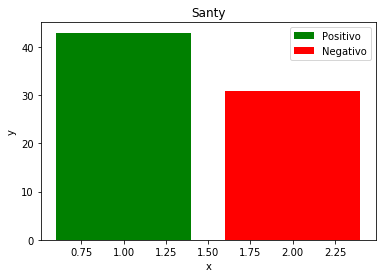

74
Calificacion =  58.108108108108105


In [96]:
x = [1]
y=0
contp = 0
for p in clas:
    if p == 'pos':
        contp+=1
        y+=1
pos = y

x2 = [2]
y2=0
contn = 0
for n in clas:
    if n == 'neg':
        contn+=1
        y2+=1
neg = y2
plt.bar(x, y, label='Positivo', color='green')
plt.bar(x2, y2, label='Negativo', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Santy')
plt.legend()
plt.show()
print(len(clas))
print("Calificacion = ",(contp/len(clas))*100)